In [1]:
!pip install xgboost scikit-learn matplotlib pandas numpy


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [9]:
# Load the dataset
file_path = "C:/Users/sudiy/OneDrive/Desktop/Big_data_Assignment corn_data set.csv"
df = pd.read_csv(file_path)

In [13]:
# Convert OB_DT to datetime format
df["OB_DT"] = pd.to_datetime(df["OB_DT"], errors='coerce')

# Now extract time-based features
df["Year"] = df["OB_DT"].dt.year
df["Month"] = df["OB_DT"].dt.month

# Check if it worked
print(df.dtypes)
print(df.head())

OB_DT      datetime64[ns]
PMAIZMT           float64
Year                int32
Month               int32
dtype: object
       OB_DT     PMAIZMT  Year  Month
0 1990-01-01  105.900513  1990      1
1 1990-02-01  106.294167  1990      2
2 1990-03-01  109.837318  1990      3
3 1990-04-01  118.498337  1990      4
4 1990-05-01  121.254097  1990      5


In [17]:
# Define Features (X) - Exclude the target column
X = df.drop(columns=["PMAIZMT", "OB_DT"])  # Drop target & date column

# Define Target Variable (y)
y = df["PMAIZMT"]  # Corn price/yield


In [19]:
# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (337, 2), Testing data: (85, 2)


In [21]:
# Initialize and train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [25]:
# Calculate performance metrics
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
  # RMSE
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Model Performance: RMSE = {rmse:.2f}, R² = {r2:.2f}")


Model Performance: RMSE = 86.41, R² = -1.19


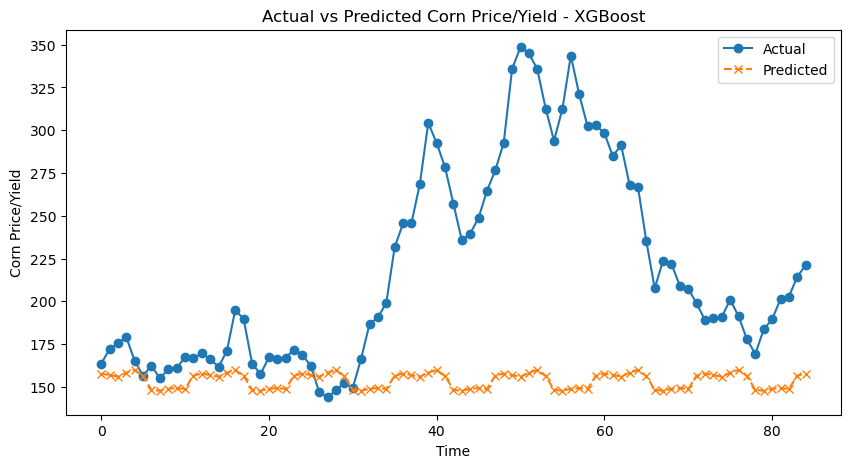

In [27]:
#Visualize Predictions vs. Actual Values
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Corn Price/Yield")
plt.title("Actual vs Predicted Corn Price/Yield - XGBoost")
plt.legend()
plt.show()
